Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [43]:
consumption_data=pd.read_csv("/content/drive/MyDrive/Main Project/Models/Energy Consumption data site id 8.csv")
consumption_data.head()

,Date,Timestamp,year,Month,Temperature,Holiday,Is_Working_Day,Values
0,2013-03-21,2013-03-21 00:00:00+00:00,2013,3,13.0,Working Day,1,51.953817
1,2013-03-22,2013-03-22 00:00:00+00:00,2013,3,15.0,Working Day,1,42.459353
2,2013-03-23,2013-03-23 00:00:00+00:00,2013,3,15.0,Working Day,1,34.399994
3,2013-03-24,2013-03-24 00:00:00+00:00,2013,3,14.8,Working Day,1,35.669267
4,2013-03-25,2013-03-25 00:00:00+00:00,2013,3,19.0,Working Day,1,52.242278


In [44]:
consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1446 non-null   object 
 1   Timestamp       1446 non-null   object 
 2   year            1446 non-null   int64  
 3   Month           1446 non-null   int64  
 4   Temperature     1446 non-null   float64
 5   Holiday         1446 non-null   object 
 6   Is_Working_Day  1446 non-null   int64  
 7   Values          1446 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 90.5+ KB


In [45]:
consumption_data['Timestamp']=pd.to_datetime(consumption_data['Timestamp'])
consumption_data['Date']=pd.to_datetime(consumption_data['Date'])

In [46]:
df_input=consumption_data[['Temperature','Is_Working_Day','Values']]

In [47]:
df_input.describe()

,Temperature,Is_Working_Day,Values
count,1446.000000,1446.000000,1446.000000
mean,11.640871,0.966805,38.611312
std,4.660079,0.179207,14.469111
min,-1.000000,0.000000,10.523878
25%,8.000000,1.000000,26.090481
50%,12.000000,1.000000,39.070160
75%,15.000000,1.000000,51.253927
max,25.000000,1.000000,70.386073


In [48]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df_input)
df_scaled

array([[0.53846154, 1.        , 0.69208853],
       [0.61538462, 1.        , 0.53348318],
       [0.61538462, 1.        , 0.39885132],
       ...,
       [0.65384615, 1.        , 0.34705537],
       [0.64423077, 1.        , 0.11463893],
       [0.63076923, 1.        , 0.09592022]])

In [49]:
features=df_scaled
target=df_scaled[:,-1]

In [50]:
TimeseriesGenerator(features, target, length=3, sampling_rate=1, batch_size=5)[0]

(array([[[0.53846154, 1.        , 0.69208853],
         [0.61538462, 1.        , 0.53348318],
         [0.61538462, 1.        , 0.39885132]],
 
        [[0.61538462, 1.        , 0.53348318],
         [0.61538462, 1.        , 0.39885132],
         [0.60769231, 1.        , 0.42005458]],
 
        [[0.61538462, 1.        , 0.39885132],
         [0.60769231, 1.        , 0.42005458],
         [0.76923077, 1.        , 0.69690728]],
 
        [[0.60769231, 1.        , 0.42005458],
         [0.76923077, 1.        , 0.69690728],
         [0.65384615, 1.        , 0.64440844]],
 
        [[0.76923077, 1.        , 0.69690728],
         [0.65384615, 1.        , 0.64440844],
         [0.63653846, 1.        , 0.7090143 ]]]),
 array([0.42005458, 0.69690728, 0.64440844, 0.7090143 , 0.68272541]))

In [51]:
x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.2, random_state=42, shuffle= False)

In [52]:
print("X train shape: ", x_train.shape)
print("X test shape: ", x_test.shape)
print("Y train shape: ", y_train.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (1156, 3)
X test shape:  (290, 3)
Y train shape:  (1156,)
Y test shape:  (290,)


In [53]:
win_length=28
batch_size=32
num_features=3
train_generator=TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator=TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [54]:
train_generator[0]

(array([[[0.53846154, 1.        , 0.69208853],
         [0.61538462, 1.        , 0.53348318],
         [0.61538462, 1.        , 0.39885132],
         ...,
         [0.51923077, 1.        , 0.64593451],
         [0.48846154, 1.        , 0.73228489],
         [0.5       , 1.        , 0.74775977]],
 
        [[0.61538462, 1.        , 0.53348318],
         [0.61538462, 1.        , 0.39885132],
         [0.60769231, 1.        , 0.42005458],
         ...,
         [0.48846154, 1.        , 0.73228489],
         [0.5       , 1.        , 0.74775977],
         [0.5       , 1.        , 0.66195441]],
 
        [[0.61538462, 1.        , 0.39885132],
         [0.60769231, 1.        , 0.42005458],
         [0.76923077, 1.        , 0.69690728],
         ...,
         [0.5       , 1.        , 0.74775977],
         [0.5       , 1.        , 0.66195441],
         [0.42884615, 1.        , 0.59367999]],
 
        ...,
 
        [[0.42884615, 1.        , 0.59367999],
         [0.42307692, 1.        , 0.51354

In [55]:
# Model Architecture

model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 28, 128)             │          67,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 28, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 248,641 (971.25 KB)

 Trainable params: 248,641 (971.25 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Defining Model

early_stopping= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=5,
                                                mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history= model.fit(train_generator, epochs=50,
                             validation_data=test_generator,
                             shuffle=False,
                             callbacks=[early_stopping])

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - loss: 0.0356 - mean_absolute_error: 0.1526 - val_loss: 0.0249 - val_mean_absolute_error: 0.1288
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - loss: 0.0315 - mean_absolute_error: 0.1463 - val_loss: 0.0280 - val_mean_absolute_error: 0.1410
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - loss: 0.0351 - mean_absolute_error: 0.1524 - val_loss: 0.0260 - val_mean_absolute_error: 0.1389
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0327 - mean_absolute_error: 0.1477 - val_loss: 0.0246 - val_mean_absolute_error: 0.1341
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0310 - mean_absolute_error: 0.1445 - val_loss: 0.0180 - val_mean_absolute_error: 0.1153
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - loss: 0.0232 - mean_absolute_error: 0.1223 - val_loss: 0.0118 - val_mean_absolute_error: 0.0860
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0235 - mean_absolute_error: 0.1233 - 

In [73]:
model.evaluate(test_generator, verbose=0)

[0.009485011920332909, 0.073834627866745]

In [74]:
predictions= model.predict(test_generator)
predictions.shape[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step


262

In [75]:
 predictions

array([[0.4846601 ],
       [0.29605368],
       [0.42099917],
       [0.7281336 ],
       [0.7378489 ],
       [0.7320094 ],
       [0.68301314],
       [0.5064776 ],
       [0.30255088],
       [0.45866457],
       [0.72304815],
       [0.72448534],
       [0.70826006],
       [0.6580977 ],
       [0.49888453],
       [0.25623336],
       [0.35371298],
       [0.5813457 ],
       [0.6045306 ],
       [0.58680254],
       [0.5266667 ],
       [0.37226132],
       [0.18818885],
       [0.24292493],
       [0.51161426],
       [0.5606125 ],
       [0.5644997 ],
       [0.52661103],
       [0.3758693 ],
       [0.18366909],
       [0.3222249 ],
       [0.5885208 ],
       [0.6245193 ],
       [0.6267231 ],
       [0.5836081 ],
       [0.41617072],
       [0.23574123],
       [0.45597583],
       [0.7258429 ],
       [0.7351016 ],
       [0.72481775],
       [0.6528253 ],
       [0.45885915],
       [0.27340895],
       [0.49080184],
       [0.7504464 ],
       [0.75837076],
       [0.746

In [76]:
y_test

array([0.4953767 , 0.30435191, 0.23210822, 0.74382809, 0.70588324,
       0.70986378, 0.79430846, 0.62297214, 0.27318038, 0.37929816,
       0.7981161 , 0.84517223, 0.99042264, 1.        , 0.7694855 ,
       0.61559742, 0.47774052, 0.67718498, 0.88089188, 0.81636496,
       0.67285487, 0.63200072, 0.29480462, 0.28096104, 0.75532619,
       0.70324082, 0.75575469, 0.81953737, 0.69249072, 0.40369262,
       0.38006871, 0.75868653, 0.81000511, 0.76024643, 0.73794936,
       0.5897859 , 0.31042985, 0.21820075, 0.59422877, 0.52176708,
       0.6060614 , 0.57336756, 0.44156982, 0.23152937, 0.20136895,
       0.46525387, 0.56211754, 0.47335027, 0.48052954, 0.40762806,
       0.22807506, 0.2318188 , 0.4713694 , 0.44042715, 0.47682714,
       0.46561095, 0.49513238, 0.24107291, 0.21741141, 0.64250274,
       0.6429989 , 0.64699072, 0.6815414 , 0.51801958, 0.29888665,
       0.23774639, 0.68416127, 0.70484206, 0.66275503, 0.81377517,
       0.5948377 , 0.34949858, 0.40263641, 0.76167852, 0.78155

In [77]:
x_test

array([[0.42307692, 1.        , 0.4953767 ],
       [0.42307692, 1.        , 0.30435191],
       [0.34615385, 1.        , 0.23210822],
       [0.30769231, 1.        , 0.74382809],
       [0.34615385, 1.        , 0.70588324],
       [0.30769231, 1.        , 0.70986378],
       [0.34615385, 1.        , 0.79430846],
       [0.41923077, 1.        , 0.62297214],
       [0.40576923, 1.        , 0.27318038],
       [0.34615385, 1.        , 0.37929816],
       [0.30769231, 1.        , 0.7981161 ],
       [0.26923077, 1.        , 0.84517223],
       [0.26923077, 1.        , 0.99042264],
       [0.23076923, 1.        , 1.        ],
       [0.15384615, 1.        , 0.7694855 ],
       [0.19230769, 1.        , 0.61559742],
       [0.19230769, 1.        , 0.47774052],
       [0.21153846, 1.        , 0.67718498],
       [0.32692308, 1.        , 0.88089188],
       [0.23076923, 1.        , 0.81636496],
       [0.46153846, 1.        , 0.67285487],
       [0.67307692, 1.        , 0.63200072],
       [0.

In [78]:
x_test[:,:-1][win_length:]

array([[0.19230769, 1.        ],
       [0.23076923, 1.        ],
       [0.42307692, 1.        ],
       [0.38461538, 1.        ],
       [0.46153846, 1.        ],
       [0.54423077, 1.        ],
       [0.5       , 1.        ],
       [0.46153846, 1.        ],
       [0.34423077, 1.        ],
       [0.38269231, 1.        ],
       [0.38461538, 1.        ],
       [0.34615385, 1.        ],
       [0.34615385, 1.        ],
       [0.24615385, 1.        ],
       [0.23076923, 1.        ],
       [0.19230769, 1.        ],
       [0.20384615, 1.        ],
       [0.34615385, 1.        ],
       [0.34615385, 1.        ],
       [0.23076923, 1.        ],
       [0.34615385, 1.        ],
       [0.30769231, 1.        ],
       [0.15384615, 1.        ],
       [0.11538462, 1.        ],
       [0.07692308, 1.        ],
       [0.15384615, 1.        ],
       [0.5       , 1.        ],
       [0.41153846, 1.        ],
       [0.36538462, 1.        ],
       [0.20961538, 1.        ],
       [0.

In [79]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,:-1][win_length:])],axis=1)
df_pred

,0,0,1
0,0.484660,0.192308,1.0
1,0.296054,0.230769,1.0
2,0.420999,0.423077,1.0
3,0.728134,0.384615,1.0
4,0.737849,0.461538,1.0
...,...,...,...
257,0.371111,0.692308,1.0
258,0.343513,0.692308,1.0
259,0.254728,0.653846,1.0
260,0.157303,0.644231,1.0


In [80]:
rev_trans=scaler.inverse_transform(df_pred)
rev_trans

array([[11.60116231,  0.19230769, 70.38607316],
       [ 6.69739562,  0.23076923, 70.38607316],
       [ 9.9459784 ,  0.42307692, 70.38607316],
       [17.93147409,  0.38461538, 70.38607316],
       [18.18407083,  0.46153846, 70.38607316],
       [18.03224468,  0.54423077, 70.38607316],
       [16.75834167,  0.5       , 70.38607316],
       [12.16841745,  0.46153846, 70.38607316],
       [ 6.86632293,  0.34423077, 70.38607316],
       [10.92527872,  0.38269231, 70.38607316],
       [17.79925191,  0.38461538, 70.38607316],
       [17.83661878,  0.34615385, 70.38607316],
       [17.41476154,  0.34615385, 70.38607316],
       [16.11053979,  0.24615385, 70.38607316],
       [11.97099775,  0.23076923, 70.38607316],
       [ 5.66206747,  0.19230769, 70.38607316],
       [ 8.19653738,  0.20384615, 70.38607316],
       [14.11498761,  0.34615385, 70.38607316],
       [14.7177949 ,  0.34615385, 70.38607316],
       [14.2568661 ,  0.23076923, 70.38607316],
       [12.69333422,  0.34615385, 70.386

In [81]:
df_final= df_input[predictions.shape[0]*-1:]
df_final.count()

,0
Temperature,262
Is_Working_Day,262
Values,262


In [82]:
df_final['Consumption_pred']=rev_trans[:,0]
df_final.count()

<ipython-input-82-2795ce70e242>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Consumption_pred']=rev_trans[:,0]


,0
Temperature,262
Is_Working_Day,262
Values,262
Consumption_pred,262


In [83]:
df_final

,Temperature,Is_Working_Day,Values,Consumption_pred
1184,4.00,1,51.977893,11.601162
1185,5.00,1,34.689805,6.697396
1186,10.00,1,33.275626,9.945978
1187,9.00,1,55.940519,17.931474
1188,11.00,1,59.012562,18.184071
...,...,...,...,...
1441,17.00,1,31.927374,8.648875
1442,17.00,1,30.958712,7.931345
1443,16.00,1,31.299375,5.622921
1444,15.75,1,17.386416,3.089886


<Axes: >

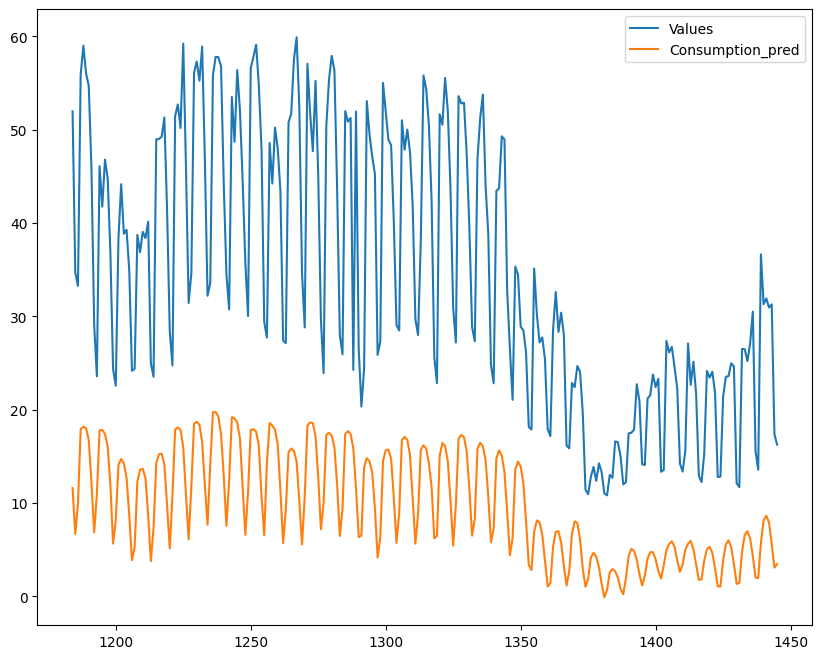

In [84]:
df_final[['Values','Consumption_pred']].plot()